# 
We will use the data from this competition https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

1. Load the data from the competition, removing any possible meaningless column.
2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?
3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.
4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.
5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.
6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.
7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv ('/Users/Anastasia/bts-mbds-data-science-foundations/TrainingSet.csv').dropna().drop(["Unnamed: 0"], axis = 1)
df.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
20,2.257446e+06,2.577942e+06,3.328705e+06,4.087907e+06,4.086801e+06,5.291039e+06,5.175389e+06,5.883546e+06,5.102752e+06,6.364148e+06,...,4.539497e+06,2.598783e+06,4.355656e+06,5.699296e+06,8.245873e+06,1.133449e+07,1.753380e+07,Afghanistan,NY.ADJ.DCO2.CD,Adjusted savings: carbon dioxide damage (curre...
26,2.233065e+07,2.654146e+07,6.606462e+07,6.882184e+07,6.463635e+07,7.252207e+07,8.584604e+07,1.121651e+08,1.638508e+08,1.732730e+08,...,1.205094e+06,9.835384e+04,2.049705e+05,6.564596e+05,4.838278e+05,5.607931e+05,5.495978e+06,Afghanistan,NY.ADJ.DNGY.CD,Adjusted savings: energy depletion (current US$)
28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Afghanistan,NY.ADJ.DMIN.CD,Adjusted savings: mineral depletion (current US$)
31,3.633483e+07,3.876103e+07,4.837836e+07,6.899526e+07,7.809190e+07,8.131705e+07,8.492192e+07,1.126985e+08,1.245812e+08,8.876818e+07,...,6.499022e+07,9.221123e+07,1.002298e+08,8.858682e+07,8.862863e+07,1.330467e+08,1.851871e+08,Afghanistan,NY.ADJ.DFOR.CD,Adjusted savings: net forest depletion (curren...
34,1.496240e+02,1.505446e+02,1.514652e+02,1.523858e+02,1.533064e+02,1.542270e+02,1.553466e+02,1.564662e+02,1.575858e+02,1.587054e+02,...,1.544154e+02,1.505050e+02,1.438986e+02,1.372922e+02,1.306858e+02,1.240794e+02,1.174730e+02,Afghanistan,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."


In [5]:

df['Series Name'].values

array(['Adjusted savings: carbon dioxide damage (current US$)',
       'Adjusted savings: energy depletion (current US$)',
       'Adjusted savings: mineral depletion (current US$)', ...,
       'Urban population (% of total)',
       'Urban population growth (annual %)',
       'Use of IMF credit (DOD, current US$)'], dtype=object)

In [6]:
df['Series Code'].str[0:2].describe()

count     54902
unique       29
top          DT
freq      17039
Name: Series Code, dtype: object

In [7]:
#df.pivot(index='Country Name', columns='Series Code').head()
#pd.melt(df, id_vars=['Country Name', 'Series Code'], var_name='Year').sort_values(['Country Name', 'Year'])

In [16]:
#df[df['Country Name'] == 'Australia'].pivot(index='Country Name', columns='Series Code')

def series_country(country):
    df1 = df[df['Country Name'] == country].set_index(['Series Name']).T
    df1.index = df1.index.str[0:5].astype(str)
    df1.index.name = 'Year'
    return df1

In [17]:
series_country("Bahrain").head()

Series Name,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: mineral depletion (current US$),Adjusted savings: net forest depletion (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural land (% of land area),...,"Secondary education, duration (years)",Secondary school starting age (years),Surface area (sq. km),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)","Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Urban population,Urban population (% of total),Urban population growth (annual %)
Year,,,,,,,,,,,,,,,,,,,,,
1972,5.42219e+06,4.92887,7.71644e+07,0,15018.5,74.17,83.7466,5.05738,78.6892,10.1449,...,5,12,690,71.1548,61.8534,9.88956e+07,8.35143e+07,193439,84.255,4.18426
1973,8.68542e+06,4.92887,1.28452e+08,0,20234.1,72.381,80.0784,4.82368,75.2547,10.1449,...,5,12,690,71.9719,62.9131,9.06191e+07,6.40159e+07,202670,84.495,4.66168
1974,9.38147e+06,4.92887,5.18338e+08,0,27310.3,70.592,76.2094,4.5377,71.6717,10.1449,...,5,12,690,72.7889,63.9728,1.75721e+08,1.31334e+08,213650,84.735,5.27601
1975,1.10585e+07,4.92887,4.21517e+08,0,40152.7,68.803,72.2811,4.24233,68.0388,11.5942,...,5,12,690,73.606,65.0325,3.10517e+08,2.8948e+08,226616,84.975,5.89178
1976,1.35196e+07,4.92887,4.83581e+08,0,31412.1,67.014,68.3781,3.93828,64.4398,14.4928,...,5,12,690,74.423,66.0922,4.5662e+08,4.36407e+08,241835,85.2002,6.49987


In [10]:
#df1 = df.loc[(df['Country Name'] == 'Australia')  & (df['Series Name']=="Alternative and nuclear energy (% of total energy use)")].T
def series_country_ch(country1, country2, country3, series_name):
    df1 = df.loc[((df['Country Name'] == country1)|(df['Country Name'] == country2)|(df['Country Name'] == country3)) & (df['Series Name']==series_name)].set_index(['Series Code']).T
    df1.index = df1.index.str[0:5].astype(str)
    df1.index.name = 'Year'
    return df1


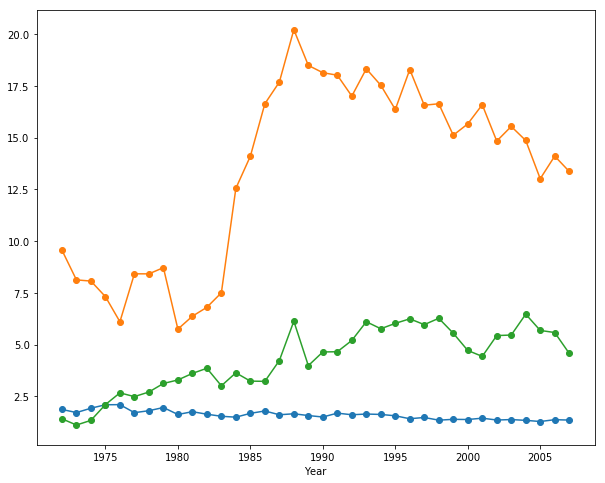

In [11]:
df2 = series_country_ch("Australia", "Turkey", "Spain", "Alternative and nuclear energy (% of total energy use)" )


df2.drop(df2.tail(2).index,inplace=True)
df2.index = df2.index.astype(int)

df2.plot(legend = False, figsize = (10,8), style="-o");



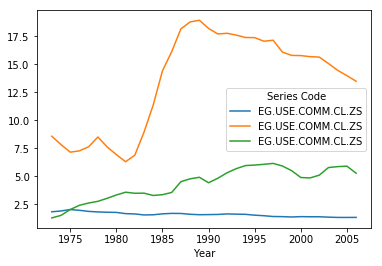

In [12]:
df2.rolling(center = True, window = 3).mean().plot();
#how do I get the right names for the legend????

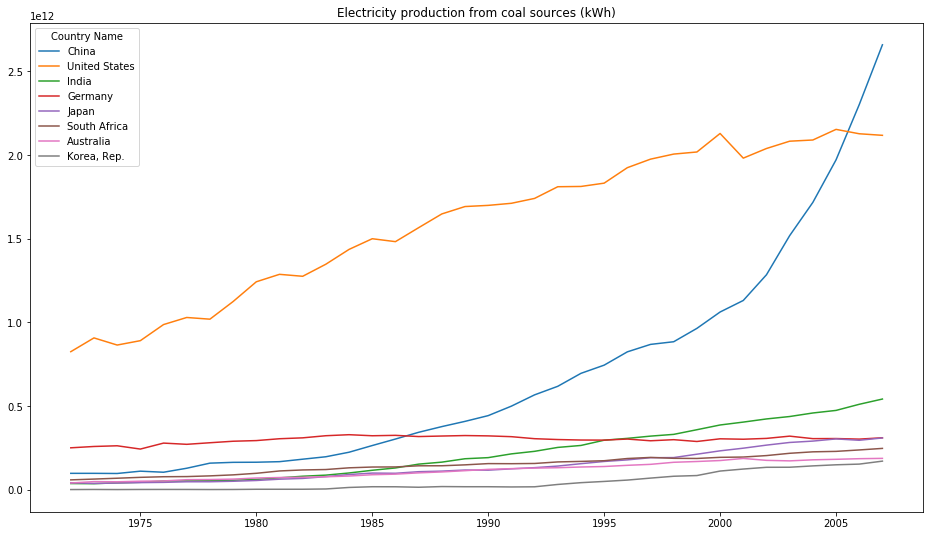

In [13]:
df8 = df.loc[df['Series Name']== "Electricity production from coal sources (kWh)"].sort_values(by=['2007 [YR2007]'], ascending=False).set_index(keys = "Country Name").head(8).T
df8.drop(df8.tail(2).index,inplace=True)
df8.index = df8.index.str[0:5].astype(int)
df8.plot( title="Electricity production from coal sources (kWh)", figsize = (16, 9));


In [14]:
df_percent = df.loc[df['Series Name']== "Electricity production from coal sources (kWh)"].set_index(keys = "Country Name")
df_percent["Growth during last 5 years"] = (df_percent["2007 [YR2007]"]/df_percent["2003 [YR2003]"])


Country Name,Chile,Argentina,Vietnam,China,Turkey,Thailand,Myanmar,"Korea, Rep."
2003,4.878e+09,9.3e+08,7.237e+09,1.5187e+12,3.2252e+10,1.9369e+10,6.34e+08,1.34222e+11
2004,7.718e+09,1.67e+09,7.173e+09,1.71747e+12,3.4448e+10,2.0605e+10,4.05e+08,1.42263e+11
2005,7.212e+09,2.172e+09,1.2173e+10,1.97177e+12,4.3192e+10,2.0522e+10,5.89e+08,1.48791e+11
2006,1.0599e+10,1.986e+09,1.4112e+10,2.3019e+12,4.665e+10,2.5309e+10,7.86e+08,1.52914e+11
2007,1.3259e+10,2.328e+09,1.4618e+10,2.65962e+12,5.3431e+10,3.0768e+10,8.55e+08,1.70704e+11


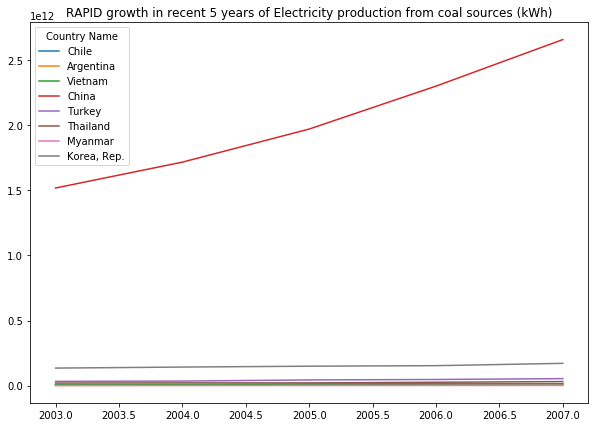

In [15]:
df_final = df_percent.sort_values(by=['Growth during last 5 years'], ascending=False).head(8).T.loc["2003 [YR2003]":"2007 [YR2007]", :]
df_final.index = df_final.index.str[0:5].astype(int)

df_final.plot( title="RAPID growth in recent 5 years of Electricity production from coal sources (kWh)", figsize = (10, 7));
df_final